In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [83]:
data_train = pd.read_csv('C:/Users/User/Downloads/dataset-0510/train.csv',header=0)
data_test = pd.read_csv('C:/Users/User/Downloads/dataset-0510/test.csv',header=0)
data_train.shape
data_test.shape

(60000, 235)

(10000, 234)

In [84]:
data_train.shape

(60000, 235)

In [85]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(35), int64(199), object(1)
memory usage: 107.6+ MB


In [86]:
data_train.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,3103.000000,1.393500e+04,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0,60000.000000,6.000000e+04
mean,7.267917,11.414533,19488.957917,7.638250,1.931817,2.319200,11050.437183,1.585700,7.211837,5.025058e+04,...,60.867700,0.995800,252.823100,0.999867,5276.668033,1.0,16474.836600,1.0,101.044751,1.293727e+07
std,2.170741,4.751677,727.331019,5.070314,1.589972,1.399528,4344.018090,0.778952,20.453902,3.973488e+04,...,88.512972,0.064672,322.694074,0.011546,3856.219059,0.0,8998.020659,0.0,80.216061,5.522463e+07
min,1.000000,3.000000,18112.000000,1.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,19.000000,1.0,30.000000,1.0,0.064766,2.261495e+05
25%,8.000000,7.000000,18892.750000,4.000000,0.000000,2.000000,7186.000000,2.000000,3.738412,2.827238e+04,...,20.000000,1.000000,88.000000,1.000000,2672.000000,1.0,8859.000000,1.0,49.182384,2.433114e+06
50%,8.000000,12.000000,19527.000000,5.000000,1.000000,2.000000,11507.000000,2.000000,5.758023,4.379195e+04,...,36.000000,1.000000,154.000000,1.000000,3942.000000,1.0,14344.000000,1.0,83.216237,5.240482e+06
75%,8.000000,13.000000,20125.000000,12.000000,4.000000,2.000000,14519.000000,2.000000,7.180619,6.148857e+04,...,64.000000,1.000000,275.000000,1.000000,6647.000000,1.0,23459.250000,1.0,130.779416,1.123932e+07
max,11.000000,21.000000,20665.000000,29.000000,4.000000,10.000000,20577.000000,2.000000,967.370868,1.020404e+06,...,1681.000000,1.000000,3463.000000,1.000000,18268.000000,1.0,32908.000000,1.0,1106.382478,5.088279e+09


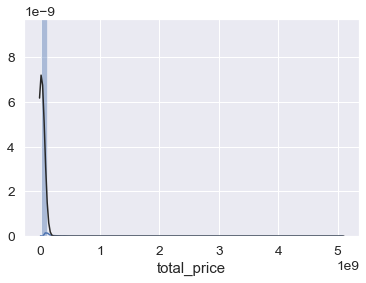

In [87]:
sns.distplot(data_train['total_price'], fit=norm)

((array([-4.23255856, -4.02871318, -3.91765076, ...,  3.91765076,
          4.02871318,  4.23255856]),
  array([2.26149524e+05, 2.29974807e+05, 2.36275253e+05, ...,
         3.37816718e+09, 4.35703935e+09, 5.08827910e+09])),
 (19353499.889426023, 12937270.809828645, 0.3504288664599476))

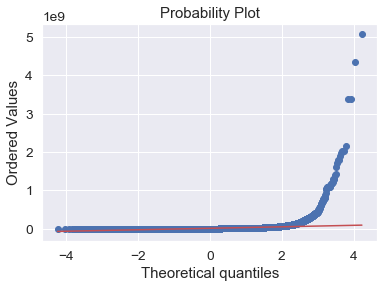

In [88]:
stats.probplot(data_train['total_price'], plot=plt)

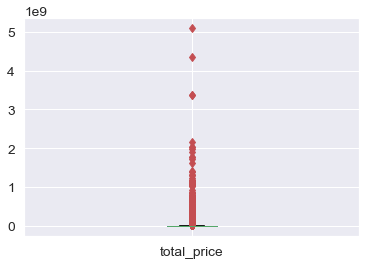

In [89]:
data_train.total_price.plot(kind='box',sym='rd')

In [90]:
categorical_features = data_train.select_dtypes(include=['object']).columns 
categorical_features

Index(['building_id'], dtype='object')

In [92]:
numerical_features= data_train.select_dtypes(exclude='object').columns 
numerical_features 
numerical_features.drop('total_price')

Index(['building_material', 'city', 'txn_dt', 'total_floor', 'building_type',
       'building_use', 'building_complete_dt', 'parking_way', 'parking_area',
       'parking_price',
       ...
       'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000', 'XIV_5000',
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price'],
      dtype='object', length=234)

Index(['building_material', 'city', 'txn_dt', 'total_floor', 'building_type',
       'building_use', 'building_complete_dt', 'parking_way', 'parking_area',
       'parking_price',
       ...
       'XIV_250', 'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000',
       'XIV_5000', 'XIV_index_5000', 'XIV_10000', 'XIV_index_10000',
       'XIV_MIN'],
      dtype='object', length=233)

In [93]:
list = ['total_floor','txn_floor','building_complete_dt',
        'building_material','city','town','txn_dt','building_material',
        'village','building_type','building_use','parking_way','lat',
        'lon','I_index_50','I_index_50','I_index_500','I_index_1000','I_index_5000',
        'I_index_10000','II_index_50','II_index_500','II_index_5000',
        'II_index_10000','III_index_50','III_index_500','III_index_1000',
        'III_index_5000','III_index_10000','V_index_50','V_index_500','V_index_1000',
        'V_index_5000','V_index_10000',
        'IV_index_50','IV_index_500','IV_index_1000','IV_index_5000','IV_index_10000','VI_index_50',
        'VI_index_500','VI_index_1000','VI_index_5000','VI_index_10000',
        'VII_index_50','VII_index_500','VII_index_1000','VII_index_5000',
        'VII_index_10000','VIII_index_50','VIII_index_500','VIII_index_1000','VIII_index_5000',
        'VIII_index_10000','IX_index_50','IX_index_500',
        'IX_index_1000','IX_index_5000','IX_index_10000',
        'X_index_50','X_index_500','X_index_1000','X_index_5000','X_index_10000',
        'XI_index_50','XI_index_500','XI_index_1000','XI_index_5000',
        'XI_index_10000','XII_index_50','XII_index_500','XII_index_1000','XII_index_5000',
        'XII_index_10000','XIII_index_50','XIII_index_500','XIII_index_1000','XIII_index_5000',
        'XIII_index_10000','XIV_index_50','XIV_index_500','XIV_index_1000','XIV_index_5000',
        'XIV_index_10000']
for i in list:
    data_train[i] = data_train[i].astype(str)

In [94]:
numerical_features= data_train.select_dtypes(exclude='object').columns 
numerical_features 

Index(['parking_area', 'parking_price', 'land_area', 'building_area',
       'village_income_median', 'town_population', 'town_area',
       'town_population_density', 'doc_rate', 'master_rate',
       ...
       'XIV_10', 'XIV_50', 'XIV_100', 'XIV_250', 'XIV_500', 'XIV_1000',
       'XIV_5000', 'XIV_10000', 'XIV_MIN', 'total_price'],
      dtype='object', length=152)

In [95]:
categorical_features = data_train.select_dtypes(include=['object']).columns 
categorical_features

Index(['building_id', 'building_material', 'city', 'txn_dt', 'total_floor',
       'building_type', 'building_use', 'building_complete_dt', 'parking_way',
       'txn_floor', 'town', 'lat', 'lon', 'village', 'I_index_50',
       'I_index_500', 'I_index_1000', 'I_index_5000', 'I_index_10000',
       'II_index_50', 'II_index_500', 'II_index_5000', 'II_index_10000',
       'III_index_50', 'III_index_500', 'III_index_1000', 'III_index_5000',
       'III_index_10000', 'IV_index_50', 'IV_index_500', 'IV_index_1000',
       'IV_index_5000', 'IV_index_10000', 'V_index_50', 'V_index_500',
       'V_index_1000', 'V_index_5000', 'V_index_10000', 'VI_index_50',
       'VI_index_500', 'VI_index_1000', 'VI_index_5000', 'VI_index_10000',
       'VII_index_50', 'VII_index_500', 'VII_index_1000', 'VII_index_5000',
       'VII_index_10000', 'VIII_index_50', 'VIII_index_500', 'VIII_index_1000',
       'VIII_index_5000', 'VIII_index_10000', 'IX_index_50', 'IX_index_500',
       'IX_index_1000', 'IX_index_

In [96]:
# 查看与y变量 高相关性的变量的箱线图
train_number = data_train.select_dtypes(include = [np.number]), axis=1)
corr = data_train.corr()
corr_threshvalue = 0.5 #number of variables for heatmap
corr_cols = corr.loc[:, corr.loc['total_price',:].abs() > corr_threshvalue].columns
train_number[corr_cols].plot(sym='rd', kind='box', subplots=True, figsize=(20, 8))

SyntaxError: invalid syntax (<ipython-input-96-fb8a29734ff8>, line 2)

In [71]:
corr = data_train.select_dtypes(include = [np.number]).iloc[:, 0:].corr()
corr

,parking_area,parking_price,land_area,building_area,village_income_median,town_population,town_area,town_population_density,doc_rate,master_rate,...,XIV_10,XIV_50,XIV_100,XIV_250,XIV_500,XIV_1000,XIV_5000,XIV_10000,XIV_MIN,total_price
parking_area,1.000000,0.110860,0.228492,0.677588,0.024974,0.006253,-0.001431,0.005996,0.051031,0.055825,...,0.046914,0.013130,0.023424,0.015558,0.001466,-0.005376,-0.016312,0.019454,0.046214,0.377045
parking_price,0.110860,1.000000,0.174223,0.230398,0.211058,0.219584,-0.174577,0.336036,0.590219,0.610375,...,-0.011587,0.009315,0.017829,0.039060,0.044728,0.043027,0.120543,0.229069,-0.032613,0.458674
land_area,0.228492,0.174223,1.000000,0.422362,-0.052329,-0.130756,0.084465,-0.156305,-0.069162,-0.085478,...,0.026683,0.011688,0.002899,-0.017998,-0.037673,-0.059046,-0.117545,-0.147744,0.089823,0.313409
building_area,0.677588,0.230398,0.422362,1.000000,0.056407,-0.045745,0.019306,-0.055396,-0.023314,-0.027527,...,0.023979,0.008892,0.010773,0.000783,-0.010150,-0.025150,-0.053542,-0.056485,0.053190,0.459167
village_income_median,0.024974,0.211058,-0.052329,0.056407,1.000000,0.045816,-0.039887,0.056567,0.359495,0.382248,...,-0.049875,-0.101150,-0.124588,-0.163886,-0.202241,-0.216428,-0.192382,-0.054880,0.176580,0.145541
town_population,0.006253,0.219584,-0.130756,-0.045745,0.045816,1.000000,-0.121447,0.520878,0.013490,0.069791,...,0.010841,0.038440,0.068722,0.129598,0.204789,0.266029,0.540439,0.550937,-0.112719,0.043547
town_area,-0.001431,-0.174577,0.084465,0.019306,-0.039887,-0.121447,1.000000,-0.635072,-0.210990,-0.196776,...,-0.034337,-0.057642,-0.075531,-0.106829,-0.138267,-0.154955,-0.338761,-0.342819,0.197713,-0.038765
town_population_density,0.005996,0.336036,-0.156305,-0.055396,0.056567,0.520878,-0.635072,1.000000,0.186118,0.218609,...,0.030172,0.062205,0.090913,0.150166,0.207884,0.245571,0.557989,0.665773,-0.224790,0.066544
doc_rate,0.051031,0.590219,-0.069162,-0.023314,0.359495,0.013490,-0.210990,0.186118,1.000000,0.990959,...,0.000168,-0.005886,-0.014689,-0.034974,-0.072827,-0.111162,-0.102184,0.093612,-0.066106,0.165599
master_rate,0.055825,0.610375,-0.085478,-0.027527,0.382248,0.069791,-0.196776,0.218609,0.990959,1.000000,...,0.001743,-0.000484,-0.006389,-0.020693,-0.052115,-0.085268,-0.061492,0.143685,-0.063246,0.168603


<Figure size 864x864 with 0 Axes>

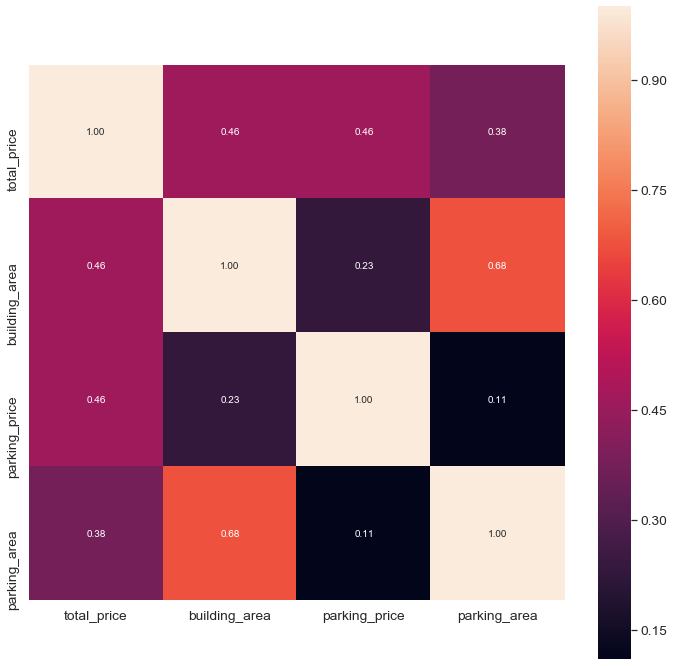

In [75]:
corr_threshvalue = 0.35 
corr_cols = corr.loc[:, corr.loc['total_price',:].abs() > corr_threshvalue].sort_values(by='total_price', axis=1 , ascending=False).columns
corr_thresh = data_train[corr_cols].corr()
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.25)
sns.heatmap(corr_thresh, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [28]:
def anova(train, categorical, y):
    anv = pd.DataFrame(index=categorical)
    anv['feature'] = categorical
    pvals = []
    for c in categorical:
        samples = []
        for cls in train[c].dropna().unique():
            s = train[train[c] == cls][y].values
            samples.append(s)  # 某特征下不同取值对应的房价组合形成二维列表
        pval = stats.f_oneway(*samples)[1]  # 一元方差分析得到 F，P，要的是 P，P越小，对方差的影响越大。
        pvals.append(pval)
    anv['pval'] = pvals
    anv['disparity'] = np.log(20*1./anv['pval'].values)/np.log(20)  # 区分度
    return anv.sort_values('pval')

In [30]:
cate_feature = [column for column in data_train.columns if data_train.dtypes[column] == 'object'] # 类型变量集合
y = 'total_price'
corr_cate = anova(data_train, cate_feature, y)

C:\Users\User\Anaconda3\envs\pythonml_0618\lib\site-packages\scipy\stats\stats.py:2960: RuntimeWarning: divide by zero encountered in double_scalars
  msw = sswn / dfwn
C:\Users\User\Anaconda3\envs\pythonml_0618\lib\site-packages\scipy\stats\stats.py:2959: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn
C:\Users\User\Anaconda3\envs\pythonml_0618\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


In [24]:
train_nas= data_train.isnull().sum().sort_values(ascending=False)
percent= (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([train_nas,percent],axis=1,keys=['train_nas','percent'])
missing_data.head(20)

,train_nas,percent
parking_area,56897,0.948283
parking_price,46065,0.767750
village_income_median,1142,0.019033
total_price,0,0.000000
III_index_1000,0,0.000000
IV_500,0,0.000000
IV_250,0,0.000000
IV_100,0,0.000000
IV_index_50,0,0.000000
IV_50,0,0.000000


In [60]:
data_train_1 = data_train.drop(labels=['building_id','born_rate','death_rate','marriage_rate','divorce_rate'],axis='columns')
data_train_1

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,8,21,18674,4,3,2,6271,2,NaN,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,13.381036
1,8,7,18800,5,1,2,7885,2,NaN,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,15.015913
2,8,7,19289,4,1,2,6028,2,NaN,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,16.074236
3,8,21,20385,24,0,2,18325,0,NaN,81138.889760,...,20,1,125,1,2568,1,7271,1,99.628966,16.469809
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,18,1,47,1,2587,1,7442,1,124.131236,13.544637
5,8,21,18394,5,1,2,6576,2,NaN,NaN,...,58,1,314,1,2725,1,7417,1,61.109908,12.890313
6,8,7,20474,15,0,2,16559,0,NaN,61488.568950,...,65,1,252,1,11515,1,26867,1,196.690224,15.956787
7,8,12,18185,8,3,2,11934,1,NaN,6721.823057,...,64,1,181,1,11456,1,19514,1,66.780308,14.333368
8,8,21,18794,5,1,2,7640,2,NaN,NaN,...,116,1,203,1,2666,1,7014,1,40.349486,13.802448
9,8,7,19927,10,3,2,9863,0,NaN,61488.568950,...,118,1,288,1,12945,1,32664,1,102.955013,16.284915


In [61]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=1)
imr = imr.fit(data_train_1.values)
imputed_data = imr.transform(data_train_1.values)
imputed_data

C:\Users\User\Anaconda3\envs\pythonml_0618\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[8.00000000e+00, 2.10000000e+01, 1.86740000e+04, ...,
        1.00000000e+00, 3.44698029e+01, 1.33810359e+01],
       [8.00000000e+00, 7.00000000e+00, 1.88000000e+04, ...,
        1.00000000e+00, 4.00735735e+01, 1.50159129e+01],
       [8.00000000e+00, 7.00000000e+00, 1.92890000e+04, ...,
        1.00000000e+00, 5.44620811e+01, 1.60742364e+01],
       ...,
       [8.00000000e+00, 7.00000000e+00, 1.99010000e+04, ...,
        1.00000000e+00, 9.47995933e+01, 1.62849146e+01],
       [8.00000000e+00, 1.30000000e+01, 1.99750000e+04, ...,
        1.00000000e+00, 3.31045802e+01, 1.67105932e+01],
       [8.00000000e+00, 7.00000000e+00, 2.03850000e+04, ...,
        1.00000000e+00, 4.75098760e+01, 1.59567874e+01]])

In [89]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(categorical_features=[0])
#imputed_data1= ohe.fit_transform(imputed_data).toarray()
#imputed_data1

In [93]:
X = imputed_data1[:, :229]
Y = imputed_data1[:,230]

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=225),
                        LinearRegression())

pipe_lr.fit(X , Y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=225,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [95]:
x_pred = pipe_lr.predict(X)
print("pred:", x_pred[:5])
print("true:", imputed_data1[:5,-1])
print('Test Accuracy: %.3f' % pipe_lr.score(X, Y))

pred: [ 2386.29195953 16342.41092455 15781.95884912  1377.54635159
  2837.22891976]
true: [  647603.7705  3321452.      9570885.316  14215011.13     762711.9757]
Test Accuracy: 0.908
